In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

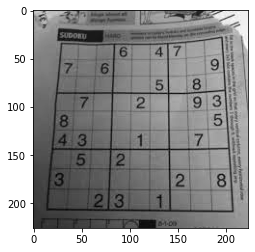

In [25]:
img = cv2.imread("C://Image_Analysis_CV//Image_Analysis_CV//images//dave.jpg",0)
plt.imshow(img,cmap='gray')

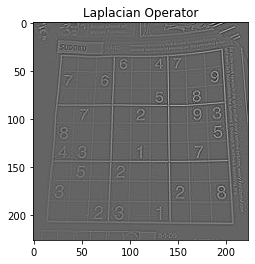

In [26]:
LoG = cv2.Laplacian(img,cv2.CV_16S)
minLoG = cv2.morphologyEx(LoG, cv2.MORPH_ERODE, np.ones((3,3)))
maxLoG = cv2.morphologyEx(LoG, cv2.MORPH_DILATE, np.ones((3,3)))
zeroCross = np.logical_or(np.logical_and(minLoG < 0,  LoG > 0), np.logical_and(maxLoG > 0, LoG < 0))

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
#sobelx = np.absolute(sobelx)
#sobelx = np.uint8(sobelx)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

gradient_magnitude = np.sqrt(np.square(sobelx) + np.square(sobely))
 
gradient_magnitude *= 255.0 / gradient_magnitude.max()
 

plt.imshow(LoG, cmap='gray')
plt.title("Laplacian Operator")
plt.show()

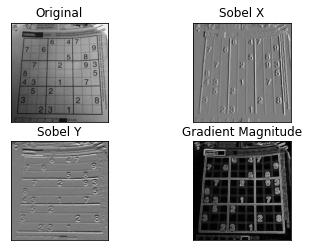

In [28]:
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(gradient_magnitude,cmap = 'gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])

plt.show()

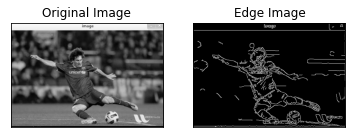

In [29]:
img = cv2.imread("C://Image_Analysis_CV//Image_Analysis_CV//images//messi5.jpg",0)
edges = cv2.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

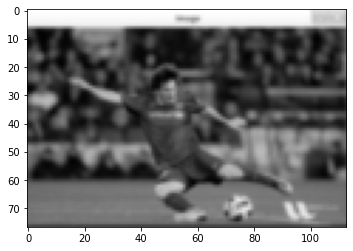

In [37]:
#img = cv2.imread('messi5.jpg')
lower_reso = cv2.pyrDown(img)
lower_reso1 = cv2.pyrDown(lower_reso)
lower_reso2 = cv2.pyrDown(lower_reso)
plt.imshow(img,cmap='gray')
plt.imshow(lower_reso,cmap='gray')
plt.imshow(lower_reso1,cmap='gray')
plt.imshow(lower_reso2,cmap='gray')

# generate Gaussian pyramid for A
G = img.copy()
gpA = [G]
for i in range(4):
    G = cv2.pyrDown(G)
    gpA.append(G)
    
#plt.imshow(gpA,cmap='gray')